In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Step 2: Load Data
train_df = pd.read_csv("C:/Users/HP/Downloads/regression-tabular-california-housing/train.csv")
test_df = pd.read_csv("C:/Users/HP/Downloads/regression-tabular-california-housing/test.csv")

In [3]:
# Display first few rows
print(train_df.head())

   id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   0  2.3859        15  3.827160   1.112100      1280.0  2.486989     34.60   
1   1  3.7188        17  6.013373   1.054217      1504.0  3.813084     38.69   
2   2  4.7750        27  6.535604   1.103175      1061.0  2.464602     34.71   
3   3  2.4138        16  3.350203   0.965432      1255.0  2.089286     32.66   
4   4  3.7500        52  4.284404   1.069246      1793.0  1.604790     37.80   

   Longitude  MedHouseVal  
0    -120.12        0.980  
1    -121.22        0.946  
2    -120.45        1.576  
3    -117.09        1.336  
4    -122.41        4.500  


In [4]:
# Check for missing values
print("Missing values before cleaning:\n", train_df.isnull().sum())

Missing values before cleaning:
 id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


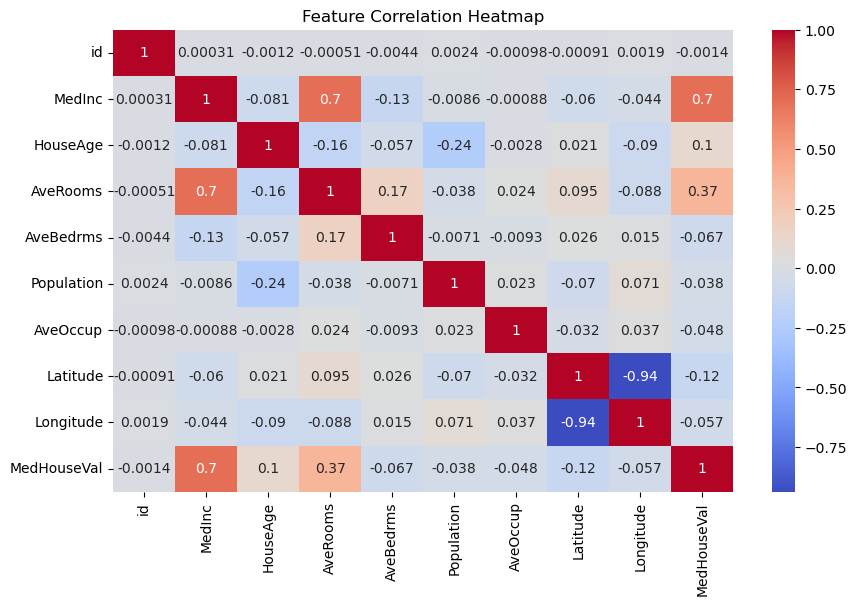

In [5]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

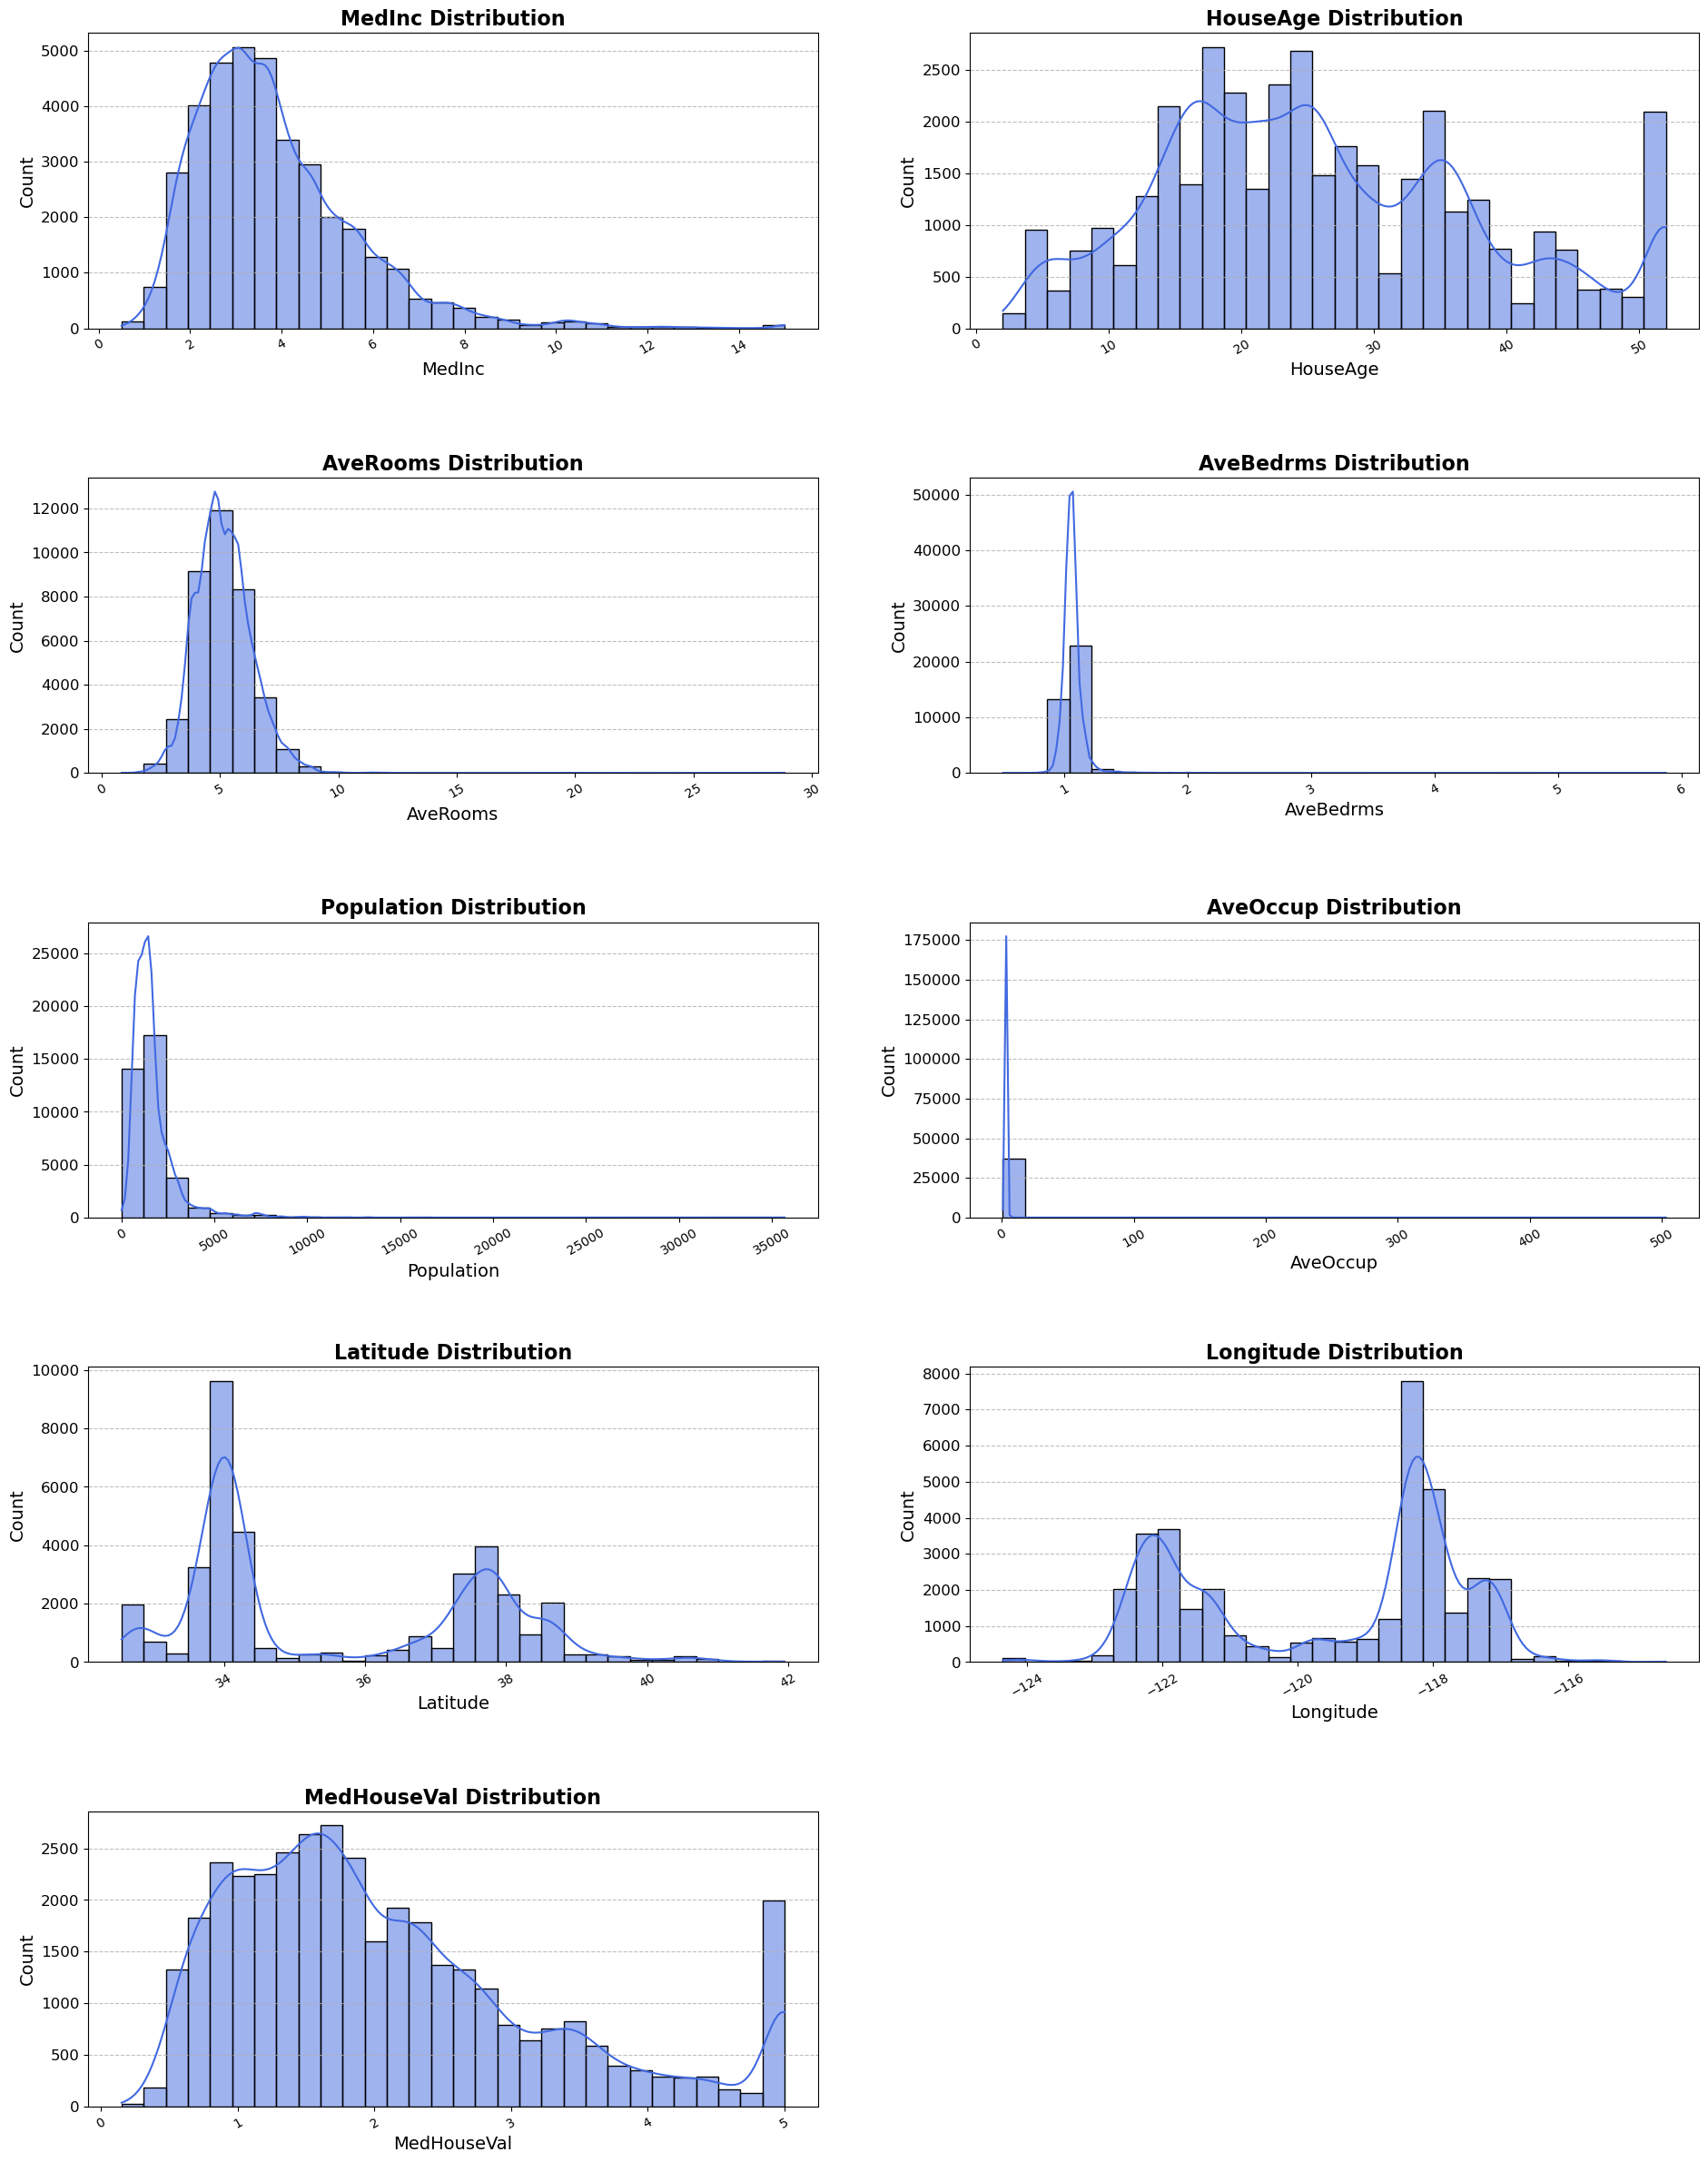

In [6]:
# Load the dataset (Ensure it's correctly loaded)
df = pd.read_csv("C:/Users/HP/Downloads/regression-tabular-california-housing/train.csv")  # Adjust path if needed

# Select numerical columns and explicitly exclude 'ID'
numerical_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'id']

# Set figure size for better visibility
plt.figure(figsize=(20, 25))

# Define grid layout (adjust rows/cols based on data size)
num_cols = 2  # 2 columns for better readability
num_rows = (len(numerical_cols) // num_cols) + 1  # Calculate rows dynamically

# Loop through selected numerical columns and create a histogram for each
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.histplot(df[col], bins=30, kde=True, edgecolor='black', color='royalblue')  
    plt.title(f"{col} Distribution", fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.8)  # Improve grid visibility

plt.tight_layout(pad=5)  # Adjust layout with spacing
plt.show()

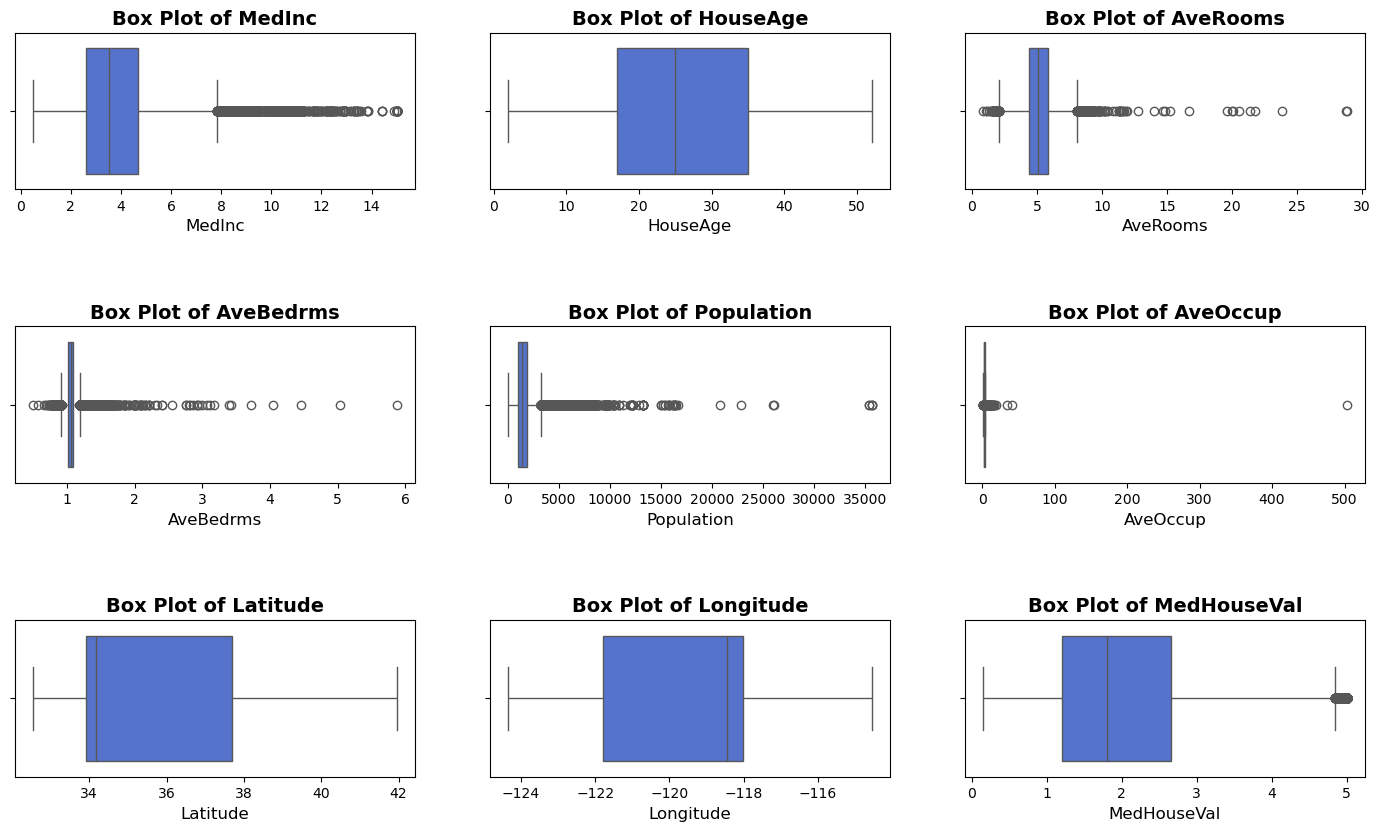

In [7]:
# Load the dataset
df = pd.read_csv("C:/Users/HP/Downloads/regression-tabular-california-housing/train.csv")  # Ensure correct file path

# Select numerical columns and exclude 'ID'
numerical_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'id']

# Define number of rows and columns for subplots
num_cols = 3  # Adjust for better layout
num_rows = (len(numerical_cols) // num_cols) + 1  # Dynamic row calculation

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))
axes = axes.flatten()

# Loop through numerical columns and create a box plot for each
for i, column in enumerate(numerical_cols):
    sns.boxplot(x=df[column], ax=axes[i], color='royalblue')
    axes[i].set_title(f'Box Plot of {column}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(column, fontsize=12)

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=5)  # Adjust layout
plt.show()

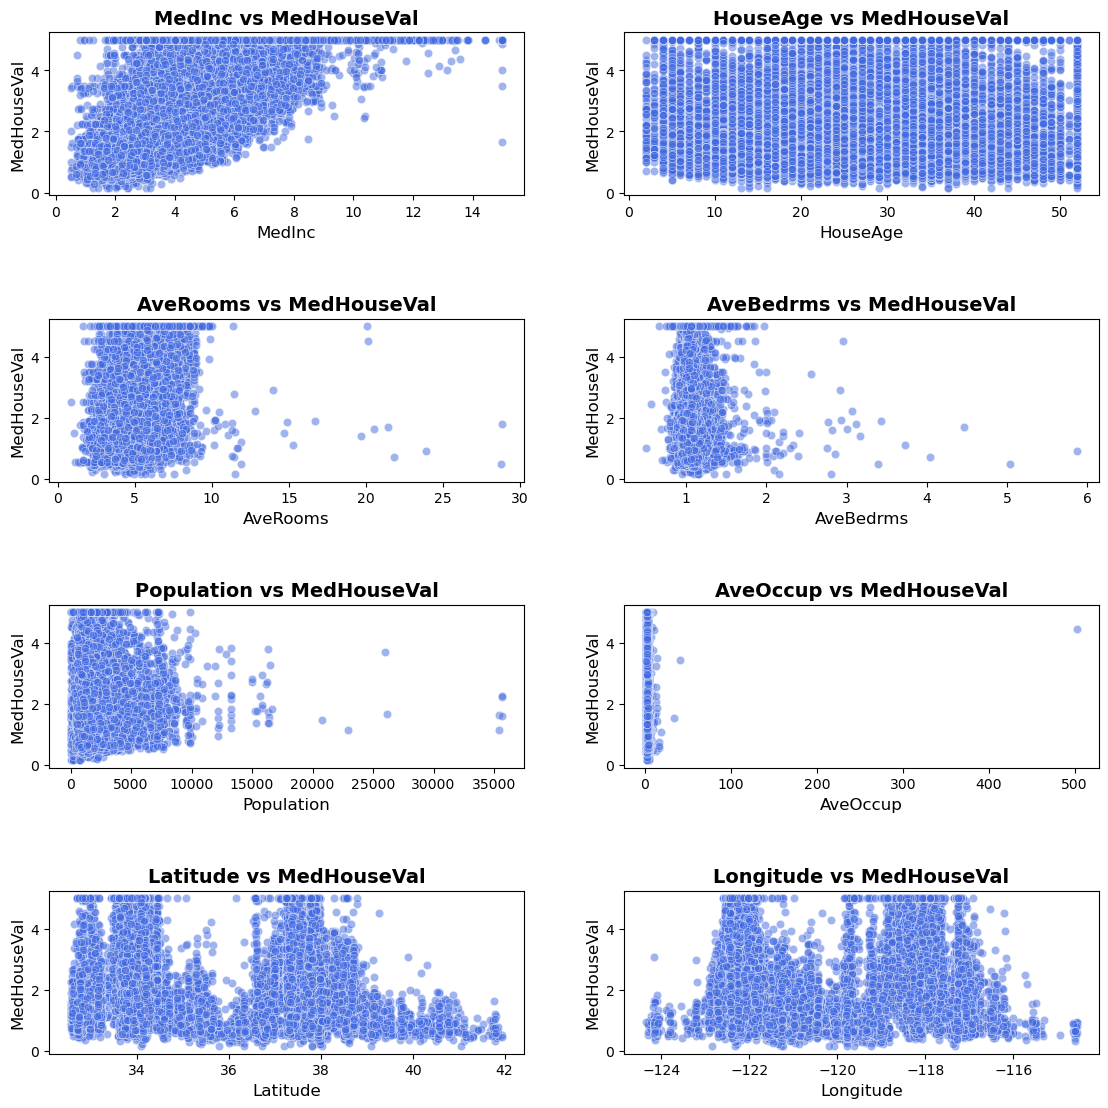

In [8]:
# Load dataset
df = pd.read_csv("C:/Users/HP/Downloads/regression-tabular-california-housing/train.csv")  # Make sure the dataset path is correct

# Define feature (X) and target variable (Y)
X = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Y = 'MedHouseVal'  # Target variable

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))  # Adjusted height for better visibility
axes = axes.flatten()

# Loop through each feature and create scatter plots
for i, feature in enumerate(X):
    sns.scatterplot(x=df[feature], y=df[Y], ax=axes[i], color='royalblue', alpha=0.5)
    axes[i].set_title(f"{feature} vs {Y}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel(Y, fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(pad=4)
plt.show()

In [9]:
# Define features and target variable
X = train_df.drop(columns=["MedHouseVal"])
y = train_df["MedHouseVal"]

In [10]:
# Outlier Detection and Removal

## Using Interquartile Range (IQR)
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

train_df_clean = remove_outliers_iqr(train_df)

In [11]:
# Check missing values after outlier removal
print("Missing values after outlier removal:\n", train_df_clean.isnull().sum())

Missing values after outlier removal:
 id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [12]:
# Drop 'id' column as it's not useful for training
train_df = train_df.drop(columns=["id"])
test_ids = test_df["id"]  # Save test IDs for submission
X_test = test_df.drop(columns=["id"])

In [13]:
# Define new features and target after cleaning
X = train_df_clean.drop(columns=["id","MedHouseVal"])
y = train_df_clean["MedHouseVal"]

In [14]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2580,4.1379,52,5.021875,1.037500,1045.0,2.137500,37.75,-122.42
34936,4.3156,35,5.790099,1.022222,1159.0,2.295050,38.70,-121.25
19861,2.1781,34,3.744425,1.072384,1867.0,3.053292,34.08,-118.30
31691,4.1167,14,5.337225,0.969828,814.0,2.702564,36.81,-119.68
28962,4.1875,16,5.601336,1.118471,1302.0,2.829978,32.82,-117.13
...,...,...,...,...,...,...,...,...
27025,4.4625,31,4.559322,1.062222,1427.0,2.571809,33.84,-118.12
6718,2.5156,36,3.618147,1.010381,880.0,2.243816,34.23,-119.01
1074,3.0437,36,3.958159,1.087866,1073.0,2.559375,37.78,-122.49
19761,3.8640,35,5.121457,0.962428,1343.0,3.243346,33.92,-117.39


In [16]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [17]:
# Dictionary to store results
models = {
    "Support Vector Machine": SVR(kernel='rbf'),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42)
}

In [18]:
# Training and evaluating models
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}
    
    print(f"{name}: MAE={mae}, MSE={mse}, RMSE={rmse}")

Support Vector Machine: MAE=0.40771399331688274, MSE=0.31596032268128355, RMSE=0.5621034804031048
Neural Network: MAE=0.4079949746659333, MSE=0.30141328685611424, RMSE=0.5490111901009981
Decision Tree: MAE=0.5345598110342501, MSE=0.5307867899443226, RMSE=0.7285511580831662
Random Forest: MAE=0.3853133553905855, MSE=0.27562853727262615, RMSE=0.525003368820264
Gradient Boosting: MAE=0.3952489834619977, MSE=0.28220078491096123, RMSE=0.5312257381857182
XGBoost: MAE=0.38039848669119947, MSE=0.2712052022634518, RMSE=0.5207736574208144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 23704, number of used features: 8
[LightGBM] [Info] Start training from score 1.916886
LightGBM: MAE=0.373176378009441, MSE=0.2575050495841526, RMS

In [19]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [20]:
# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_val_scaled)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

In [21]:
results["XGBoost"] = {"MAE": mae_xgb, "MSE": mse_xgb, "RMSE": rmse_xgb}

In [22]:
print(f"XGBoost: MAE={mae_xgb}, MSE={mse_xgb}, RMSE={rmse_xgb}")

XGBoost: MAE=0.38039848669119947, MSE=0.2712052022634518, RMSE=0.5207736574208144


In [23]:
models['Gradient Boosting'] = GradientBoostingRegressor(random_state=42)

# Training and evaluating the Gradient Boosting model
model = models['Gradient Boosting']
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

results["Gradient Boosting"] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

print(f"Gradient Boosting: MAE={mae}, MSE={mse}, RMSE={rmse}")

Gradient Boosting: MAE=0.3952489834619977, MSE=0.28220078491096123, RMSE=0.5312257381857182


In [24]:
# Train LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lgb = lgb_model.predict(X_val_scaled)
mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
mse_lgb = mean_squared_error(y_val, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)

results["LightGBM"] = {"MAE": mae_lgb, "MSE": mse_lgb, "RMSE": rmse_lgb}

print(f"LightGBM: MAE={mae_lgb}, MSE={mse_lgb}, RMSE={rmse_lgb}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 23704, number of used features: 8
[LightGBM] [Info] Start training from score 1.916886
LightGBM: MAE=0.373176378009441, MSE=0.2575050495841526, RMSE=0.5074495537333269


In [60]:
# Hyperparameter Tuning

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_val_scaled)

mae_best_rf = mean_absolute_error(y_val, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_val, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)

print(f"Best Random Forest: MAE={mae_best_rf}, MSE={mse_best_rf}, RMSE={rmse_best_rf}")

Best Random Forest: MAE=0.3835227945890227, MSE=0.27380430403961303, RMSE=0.5232631307856622


In [44]:
# Save the best model (e.g., LightGBM) to a pickle file
best_model = models["LightGBM"]  # Assuming LightGBM gave the best results
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Model saved as best_model.pkl")

Model saved as best_model.pkl
